In [1]:
import numpy as np 
import pandas as pd
from glob import glob
from tqdm import tqdm
import random

import os
for dirname, _, filenames in os.walk('DATA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



DATA\Test\Normal\testnormal_1.jpg
DATA\Test\Normal\testnormal_10.jpg
DATA\Test\Normal\testnormal_100.jpg
DATA\Test\Normal\testnormal_101.jpg
DATA\Test\Normal\testnormal_102.jpg
DATA\Test\Normal\testnormal_103.jpg
DATA\Test\Normal\testnormal_104.jpg
DATA\Test\Normal\testnormal_105.jpg
DATA\Test\Normal\testnormal_106.jpg
DATA\Test\Normal\testnormal_107.jpg
DATA\Test\Normal\testnormal_108.jpg
DATA\Test\Normal\testnormal_109.jpg
DATA\Test\Normal\testnormal_11.jpg
DATA\Test\Normal\testnormal_110.jpg
DATA\Test\Normal\testnormal_111.jpg
DATA\Test\Normal\testnormal_112.jpg
DATA\Test\Normal\testnormal_113.jpg
DATA\Test\Normal\testnormal_114.jpg
DATA\Test\Normal\testnormal_115.jpg
DATA\Test\Normal\testnormal_116.jpg
DATA\Test\Normal\testnormal_117.jpg
DATA\Test\Normal\testnormal_118.jpg
DATA\Test\Normal\testnormal_119.jpg
DATA\Test\Normal\testnormal_12.jpg
DATA\Test\Normal\testnormal_120.jpg
DATA\Test\Normal\testnormal_121.jpg
DATA\Test\Normal\testnormal_122.jpg
DATA\Test\Normal\testnormal_123.j

DATA\Train\Normal\Normal_1.jpg
DATA\Train\Normal\Normal_10.jpg
DATA\Train\Normal\Normal_100.jpg
DATA\Train\Normal\Normal_1000.jpg
DATA\Train\Normal\Normal_1001.jpg
DATA\Train\Normal\Normal_1002.jpg
DATA\Train\Normal\Normal_1003.jpg
DATA\Train\Normal\Normal_1004.jpg
DATA\Train\Normal\Normal_1005.jpg
DATA\Train\Normal\Normal_1006.jpg
DATA\Train\Normal\Normal_1007.jpg
DATA\Train\Normal\Normal_1008.jpg
DATA\Train\Normal\Normal_1009.jpg
DATA\Train\Normal\Normal_101.jpg
DATA\Train\Normal\Normal_1010.jpg
DATA\Train\Normal\Normal_1011.jpg
DATA\Train\Normal\Normal_1012.jpg
DATA\Train\Normal\Normal_1013.jpg
DATA\Train\Normal\Normal_1014.jpg
DATA\Train\Normal\Normal_1015.jpg
DATA\Train\Normal\Normal_1016.jpg
DATA\Train\Normal\Normal_1017.jpg
DATA\Train\Normal\Normal_1018.jpg
DATA\Train\Normal\Normal_1019.jpg
DATA\Train\Normal\Normal_102.jpg
DATA\Train\Normal\Normal_1020.jpg
DATA\Train\Normal\Normal_1021.jpg
DATA\Train\Normal\Normal_1022.jpg
DATA\Train\Normal\Normal_1023.jpg
DATA\Train\Normal\Norm

DATA\Train\Sleepy\Sleepy_1.jpg
DATA\Train\Sleepy\Sleepy_10.jpg
DATA\Train\Sleepy\Sleepy_100.jpg
DATA\Train\Sleepy\Sleepy_1000.jpg
DATA\Train\Sleepy\Sleepy_1001.jpg
DATA\Train\Sleepy\Sleepy_1002.jpg
DATA\Train\Sleepy\Sleepy_1003.jpg
DATA\Train\Sleepy\Sleepy_1004.jpg
DATA\Train\Sleepy\Sleepy_1005.jpg
DATA\Train\Sleepy\Sleepy_1006.jpg
DATA\Train\Sleepy\Sleepy_1007.jpg
DATA\Train\Sleepy\Sleepy_1008.jpg
DATA\Train\Sleepy\Sleepy_1009.jpg
DATA\Train\Sleepy\Sleepy_101.jpg
DATA\Train\Sleepy\Sleepy_1010.jpg
DATA\Train\Sleepy\Sleepy_1011.jpg
DATA\Train\Sleepy\Sleepy_1012.jpg
DATA\Train\Sleepy\Sleepy_1013.jpg
DATA\Train\Sleepy\Sleepy_1014.jpg
DATA\Train\Sleepy\Sleepy_1015.jpg
DATA\Train\Sleepy\Sleepy_1016.jpg
DATA\Train\Sleepy\Sleepy_1017.jpg
DATA\Train\Sleepy\Sleepy_1018.jpg
DATA\Train\Sleepy\Sleepy_1019.jpg
DATA\Train\Sleepy\Sleepy_102.jpg
DATA\Train\Sleepy\Sleepy_1020.jpg
DATA\Train\Sleepy\Sleepy_1021.jpg
DATA\Train\Sleepy\Sleepy_1022.jpg
DATA\Train\Sleepy\Sleepy_1023.jpg
DATA\Train\Sleepy\Slee

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
train_dir = 'DATA\Train'
test_dir = 'DATA\Test'

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 13859 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


Calculating class counts: 100%|██████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 38.56it/s]


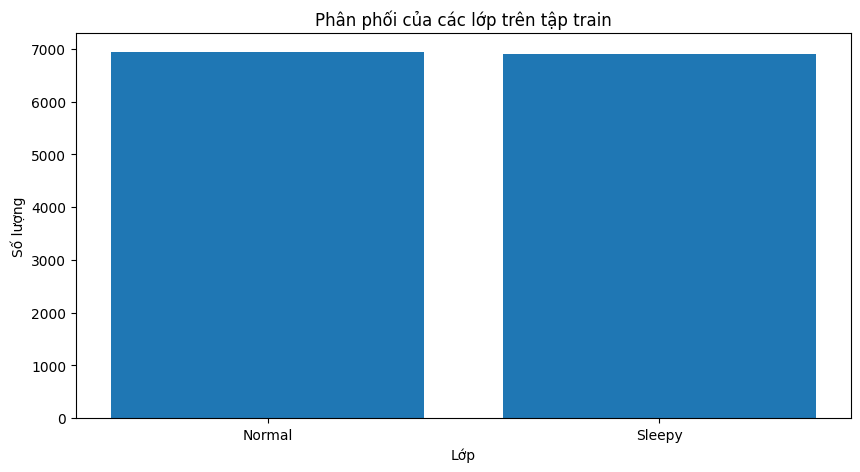

In [5]:
# Path to the training data directory
# train_data_dir = "DATA/Train"

# Get all class folders
all_classes = glob(os.path.join(train_dir, "*"))

# Extract class names without full paths
class_names = [os.path.basename(folder_class) for folder_class in all_classes]

# Count the number of samples in each class
train_class_counts = {}
for folder_class in tqdm(all_classes, desc='Calculating class counts'):
    class_count = len(glob(os.path.join(folder_class, "*")))
    class_name = os.path.basename(folder_class)
    train_class_counts[class_name] = class_count

# Sort the dictionary by class name
train_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[0]))

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Phân phối của các lớp trên tập train')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
# plt.xticks(rotation=90)
plt.show()

Calculating class counts: 100%|████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1002.70it/s]


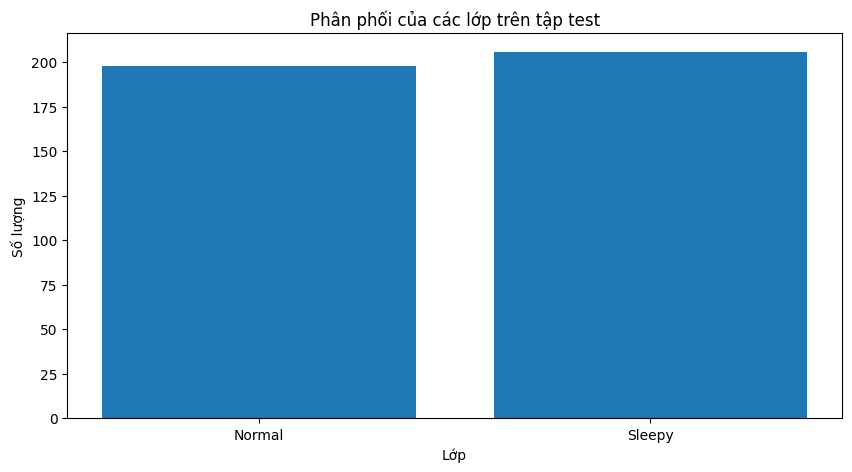

In [6]:
# Get all class folders
all_classes = glob(os.path.join(test_dir, "*"))

# Extract class names without full paths
class_names = [os.path.basename(folder_class) for folder_class in all_classes]

# Count the number of samples in each class
train_class_counts = {}
for folder_class in tqdm(all_classes, desc='Calculating class counts'):
    class_count = len(glob(os.path.join(folder_class, "*")))
    class_name = os.path.basename(folder_class)
    train_class_counts[class_name] = class_count

# Sort the dictionary by class name
train_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[0]))

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Phân phối của các lớp trên tập test')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
# plt.xticks(rotation=90)
plt.show()

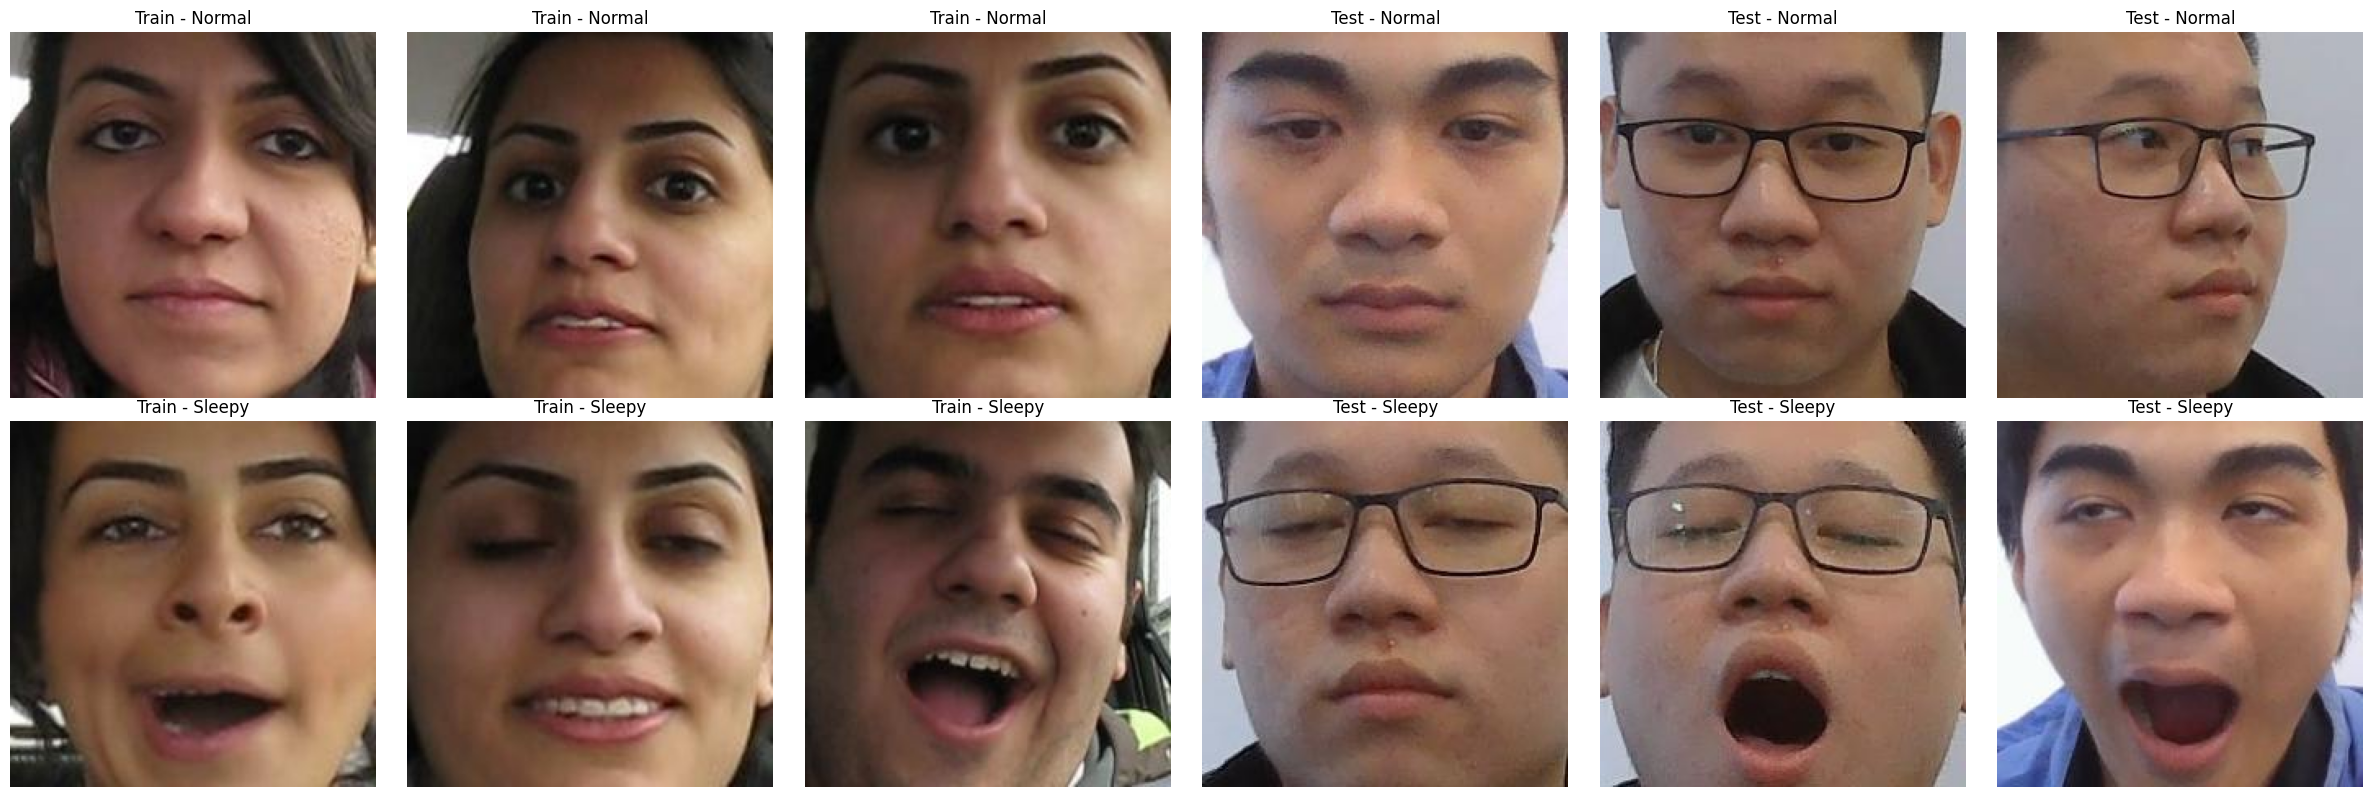

In [7]:
# Define the number of images to display per class
num_images_per_class = 3

# Get all class folders
all_classes = os.listdir(train_dir)

# Initialize figure size
num_rows = len(all_classes)
num_cols = 2 * num_images_per_class
plt.figure(figsize=(num_cols * 4, num_rows * 4))

# Loop through each class
for idx, class_name in enumerate(all_classes, start=1):
    # Get a random selection of images from the train and test directories
    train_images = random.sample(glob(os.path.join(train_dir, class_name, "*")), num_images_per_class)
    test_images = random.sample(glob(os.path.join(test_dir, class_name, "*")), num_images_per_class)
    
    # Plot the train images
    for i, train_image_path in enumerate(train_images, start=1):
        plt.subplot(num_rows, num_cols, (idx - 1) * num_cols + i)
        plt.imshow(plt.imread(train_image_path))
        plt.title(f"Train - {class_name}")
        plt.axis("off")
    
    # Plot the test images
    for i, test_image_path in enumerate(test_images, start=num_images_per_class + 1):
        plt.subplot(num_rows, num_cols, (idx - 1) * num_cols + i)
        plt.imshow(plt.imread(test_image_path))
        plt.title(f"Test - {class_name}")
        plt.axis("off")

plt.tight_layout()
plt.show()

Convolutional Neural Network

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [ ]:
model.save('CNN_1.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
path ='test_2.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
img_array = np.array(img)
img_array.shape

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('Normal')
else:
    print('Sleepy')